<a href="https://colab.research.google.com/github/majidsh97/project-2/blob/main/AST_MATH_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/inzva/Audio-Style-Transfer.git

fatal: destination path 'Audio-Style-Transfer' already exists and is not an empty directory.


In [ ]:
!pip install librosa==0.8
!pip install -q tensorflow-io

In [ ]:
import tensorflow as tf
import librosa
import os
import sys
import numpy as np
import IPython
import IPython.display as display
import time
import tensorflow_probability as tfp
from tensorflow.keras import layers
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import tensorflow.io as tfio
import scipy.fftpack
from IPython.display import display,Audio

In [ ]:

#newvalue = a * value + b. a = (max'-min')/(max-min) and b = max - a * max

def tensor_to_audio(tensor,fs,N_FFT):
  a = np.zeros_like(tensor)
  a = np.exp(tf.transpose(tensor).numpy()) - 1
  
  # This code is supposed to do phase reconstruction
  p = 2 * np.pi * np.random.random_sample(a.shape) - np.pi
  for i in range(10):
      S = a * np.exp(1j*p)
      x = librosa.istft(S)
      p = np.angle(librosa.stft(x, N_FFT))
  return x
  OUTPUT_FILENAME =   '1.wav' 
  librosa.write_wav(OUTPUT_FILENAME, x, fs)

def gram(inputs):
  #batch nist age batch mikhay bayad ye b be harf ha va ye 1 be inputs.shape azafe beshe
  gram=0
  gram = tf.matmul(tf.transpose(inputs),inputs)/(inputs.shape[0]*inputs.shape[1])
    


  return gram

def abs_angle_to_complex(abs,ang):
  ang=tf.complex(0.0,ang)
  ang=tf.math.exp(ang)
  z=tf.complex(abs,0.0)*ang
  return z

def t2a(tensor, frame_length, frame_step, fft_length):
  a=tf.complex(tensor,0.0)
  a=tf.cast(a,tf.complex64)
  a = tf.math.exp(a) - 1
  p = 2 * np.pi* tf.random.uniform(a.shape,dtype=tf.float32) - np.pi
  p=tf.complex(0.0,p)
  for i in range(10):
    S = a * tf.math.exp(p)
    x=tf.signal.inverse_stft(S, frame_length, frame_step, fft_length)
    stft=tf.signal.stft(x,frame_length, frame_step,fft_length)
    p = tf.math.angle(stft)
    p = tf.complex(0.0,p)
  return x

def imshow(img):
  plt.imshow(img+127.5/255.0)

def linear_scale(x,max_to=1,min_to=0):
  max=x.max()
  min=x.min()
  a = (max_to-min_to)/(max-min)
  b = max - a * max
  newvalue = a * x + b  
  return newvalue


def display(x,fs):
  IPython.display.display(IPython.display.Audio(x,rate=fs))

def invspectogram(spect,angle,frame_length,frame_step,fft_length):
  spect = abs_angle_to_complex(tf.math.expm1(spect),angle)
  y_invstft=tf.signal.inverse_stft(spect,frame_length,frame_step,fft_length)
  return y_invstft

def spectrogram(x,frame_length , frame_step,fft_length ):
  y=tf.signal.stft(x,frame_length,frame_step,fft_length)
  content_angle=tf.math.angle(y)
  content_spect=tf.math.log1p(tf.abs(y))
  return [content_spect , content_angle]

def window_stack(a, stepsize, width):
    return tf.stack( [a[i:1+i-width or None:stepsize]  for i in range(0,width) ],-1)


In [ ]:
os.listdir('/content/Audio-Style-Transfer/data')

['dancing_queen.mp3',
 'eminem.mp3',
 'spongebob.mp3',
 'ghetto_gospel.mp3',
 'chopin_etude_g_flat_major.mp3',
 'usa.mp3',
 'russia.mp3',
 'futurama.mp3',
 'fire.mp3',
 'imperial.mp3',
 'lemons.mp3',
 'wonderwall.mp3',
 'valkyries.mp3',
 'gettysburg.mp3',
 'nwa.mp3']

In [ ]:
CONTENT_FILENAME = "/content/Audio-Style-Transfer/data/gettysburg.mp3"
STYLE_FILENAME ="/content/Audio-Style-Transfer/data/usa.mp3"
#STYLE_FILENAME ="/content/Audio-Style-Transfer/data/imperial.mp3"
#STYLE_FILENAME ="/content/Audio-Style-Transfer/data/fire.mp3"


a_content,fs_content=librosa.load(CONTENT_FILENAME)
a_style,fs_style=librosa.load(STYLE_FILENAME)
a_style = a_style[:a_content.shape[0]]
IPython.display.display(IPython.display.Audio(a_content,rate=fs_content))
IPython.display.display(IPython.display.Audio(a_style,rate=fs_style))
IPython.display.display(IPython.display.Audio(a_style+a_content,rate=fs_style))


#a_content=np.reshape(a_content,(1,-1,1))
#a_style=np.reshape(a_style,(1,-1,1))

print(a_content.shape)
print(a_style.shape)



/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(220632,)
(220632,)


1024.0


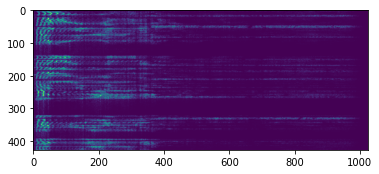

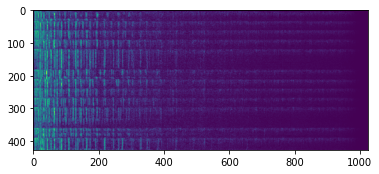

(427, 1025)


In [ ]:
n=a_content.shape[0]

frame_length = 2048
frame_step = 512
#fft_length=frame_length
resolution = frame_length/2#(fs_content)/frame_length
print(resolution)

content_stft=tf.signal.stft(a_content,frame_length,frame_step)
content_angle=tf.math.angle(content_stft)
content_spect=tf.math.log1p(tf.abs(content_stft))
style_stft=tf.signal.stft(a_style,frame_length,frame_step)
style_angle=tf.math.angle(style_stft)
style_spect=tf.math.log1p(tf.abs(style_stft))




plt.imshow(content_spect)
plt.savefig('c.png')
plt.show()
plt.imshow(style_spect)
plt.savefig('s.png')

plt.show()
print(content_spect.shape)

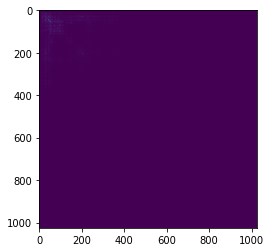

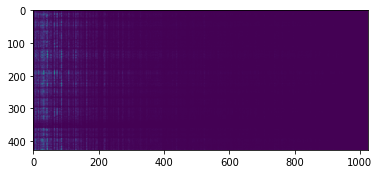

In [ ]:
x1 = tf.transpose(style_stft)@style_stft 
z1 = style_stft@tf.transpose(style_stft)

x2 = tf.transpose(content_stft)@content_stft 
z2 = content_stft@tf.transpose(content_stft)

plt.imshow(np.abs(x))
plt.show()

y = z1 @  content_stft @ x1
#y = z2 @  style_stft @ x2

plt.imshow(np.abs(y))
plt.show()
a = tf.signal.inverse_stft(y,frame_length,frame_step)
display(a,fs_content)


In [ ]:
#x=content_spect + style_spect
#tenso

(220632,) (220632,) 0.099940171869901


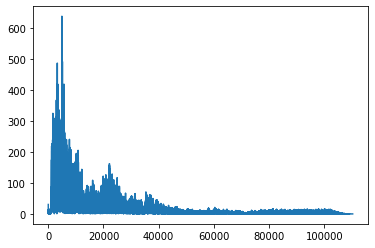

'a=tf.signal.ifft(select(f,af>1))\ndisplay(Audio(a,rate=fs))\n\nplt.semilogy(af[:int(n/2)])'

In [ ]:
def select(x,c):
  #return x*tf.cast(c , tf.complex64)
  return x*tf.cast(c , tf.float32)


def plotfft(f,fs=22050):
  #x = np.arange(-fs/2,fs/2,fs/n)
  #plt.plot(x,tf.abs(tf.signal.fftshift(f)))
  n=len(f)
  x = np.arange(0,fs/2,fs/n)
  plt.plot(x,tf.abs(f[:int(n/2)]))
  plt.show()

fs=fs_content
dt=np.arange(0,1,1/fs)
#a=np.sin(2*np.pi*2000*dt)
a=a_content
n=a.shape[0]
f=tf.signal.fft(a)
af=tf.abs(f)
print(f.shape,a.shape,fs/n)

plotfft(f,n)


In [ ]:
content_fft=tf.signal.fft(a_content)
style_fft=tf.signal.fft(a_style)

In [ ]:
#x=style_stft
#content_stft
def getth(x,k=0.5,nth=0):
  s=tf.sort(tf.reshape( x ,-1))
  a=tf.cumsum(s)#/s[-1]
  a=a/a[-1]
  plt.plot(a)
  plt.savefig('cumsum.png')
  plt.show()
  plt.semilogy(a)
  plt.show()
  #n=s.shape[0]
  #print(n,int((1-k)*n))
  #th=s[int((1-k)*n)]
  #print(th.numpy(),s[a>0.5][0])
  a = s[a>k]
  print(s.shape[0] - a.shape[0]  , a[0],s[nth])
  return a[0],s[nth]



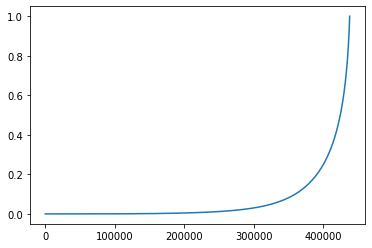

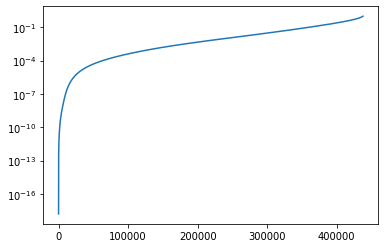

432437 tf.Tensor(2.6644926, shape=(), dtype=float32) tf.Tensor(1.1938492e-07, shape=(), dtype=float32)


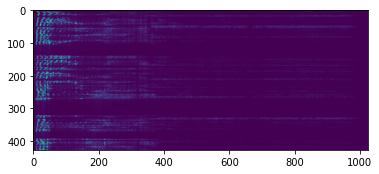

In [ ]:
x = content_spect * style_spect
#x = tf.transpose(x)@x
thx,thn=getth(x,0.7,4000)

new_c_c= select(content_spect,x>thx) 
new_s_s=select(style_spect,x>thx) 

#new_c_c = abs_angle_to_complex(new_c_c,content_angle)
#new_s_s = abs_angle_to_complex(new_s_s,style_angle)

for y in [new_s_s+0.5*content_spect]:#,new_c_c+new_s_s, new_c_c,new_s_s,tf.nn.relu(new_s_s-new_c_c)]:
  y = abs_angle_to_complex(tf.math.expm1(y),content_angle)
  y_invstft=tf.signal.inverse_stft(y,frame_length,frame_step)

  IPython.display.display(IPython.display.Audio(y_invstft,rate=fs_content))

plt.imshow(new_s_s+0.5*content_spect)


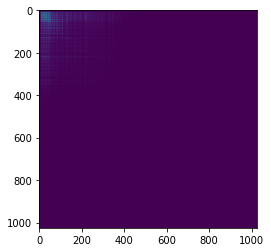

In [ ]:
plt.imshow(tf.transpose(x)@x)
plt.savefig('x.png')

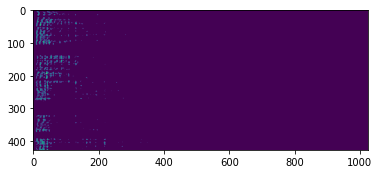

In [ ]:
a=tf.cast(x>thx , tf.float32)
IPython.display.display(IPython.display.Audio(a,rate=fs_style))
plt.imshow(new_s_s)
plt.savefig('select_s_s.png')

In [ ]:
content_spect
c_s,c_u,c_v=tf.linalg.svd(style_spect)
s_s,s_u,s_v=tf.linalg.svd(content_spect)
k=100
c_s=c_s.numpy()
c_u=c_u.numpy()
c_v=c_v.numpy()
c_s[:k]=s_s[:k]
c_u[:,:k]=s_u[:,:k]
c_v[:,:k]=s_v[:,:k]

p=c_u@tf.linalg.diag(c_s)
x=p@tf.transpose(c_v)
x=t2a(x,)

plt.plot(x)
display(Audio(x,rate=fs))